**Black Friday Sales Prediction
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.**

Importing necessary libraries


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading csv file and converting it into dataframe

In [100]:
df = pd.read_csv("Black_Friday_Sales_Prediction/train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


**Data Analysis**

The .info() method provides a quick overview of the structure and content of the DataFrame.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


The .describe() method in pandas is used to generate descriptive statistics of a DataFrame or Series.

In [102]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


A basic observation is that:

Product (ID-P00265242) is the most popular product.

Most of the transactions were made by men.

Age group with most transactions was 26-35.


In [103]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Calculating missing values and its percentage

In [104]:
missing_values=df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


Product_Category_3 is null for nearly 70% of transactions so it can't give us much information. so we gonna drop Product_Category_3

In [105]:
df.drop(['Product_Category_3'], axis=1, inplace=True)

Text(0.5, 1.0, 'type of our data')

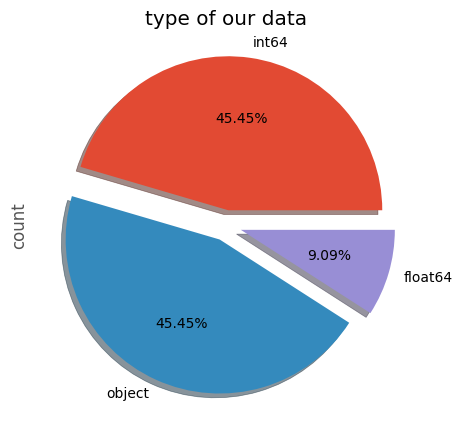

In [106]:
plt.figure(figsize=(10,5))

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data')

Pie chart shows the distribution of datatypes used in the dataset

In [107]:
# to replace the NaN values using it's median
median = df['Product_Category_2'].median()
df['Product_Category_2'].fillna(median, inplace=True)

In [108]:
missing_values=df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


This confirms that all null and NaN values of 'Product_Catergory_2' have been updated to their median values

In [109]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,9.0,7871


In [110]:
# to view total amount purchased by each age group
age_grpby = df.groupby("Age")['Purchase'].sum()
age_grpby

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

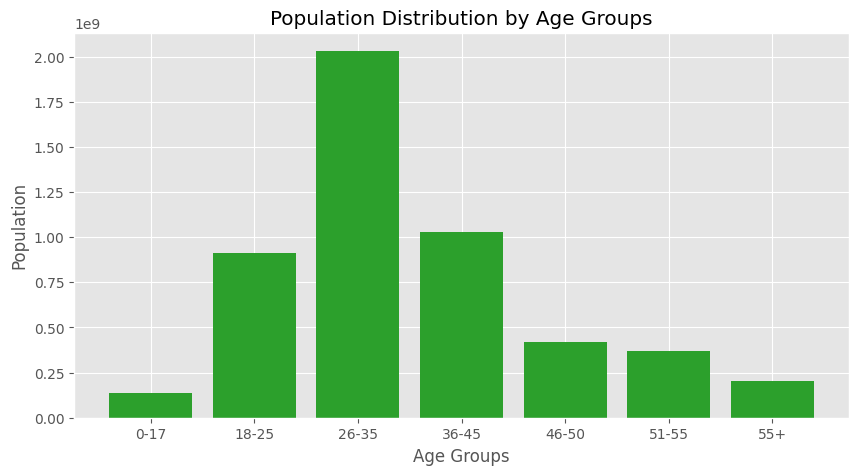

In [133]:
plt.figure(figsize=(10,5))

age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
population = [134913183, 913848675, 2031770578, 1026569884, 420843403, 367099644, 200767375]

plt.bar(age_groups, population, color='#2ca02c')

plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Population Distribution by Age Groups')
plt.show()

The age bracket of 26-35 exhibited the highest number of purchases, with the 36-45 age group coming in second.

In [112]:
# Gender vs mean purchase amount
marital_status_grpby = df.groupby('Marital_Status')['Purchase'].mean()
marital_status_grpby

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [113]:
# mean purchase value of each city category
df.groupby('City_Category')['Purchase'].mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

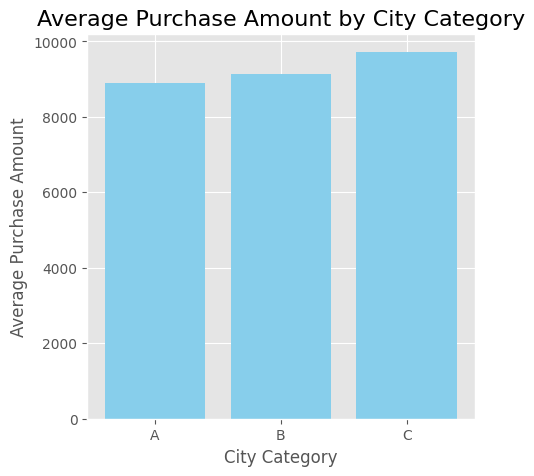

In [136]:
plt.figure(figsize=(5,5))

city_avg_purchase = pd.Series({
    'A': 8911.939216,
    'B': 9151.300563,
    'C': 9719.920993
})

plt.bar(city_avg_purchase.index, city_avg_purchase.values, color='skyblue')
plt.title('Average Purchase Amount by City Category', fontsize=16)
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.show()

City Category with most transactions was C

In [115]:
df.groupby('Occupation')['Purchase'].mean()

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

Tells us about the expenditure of people with different occupations


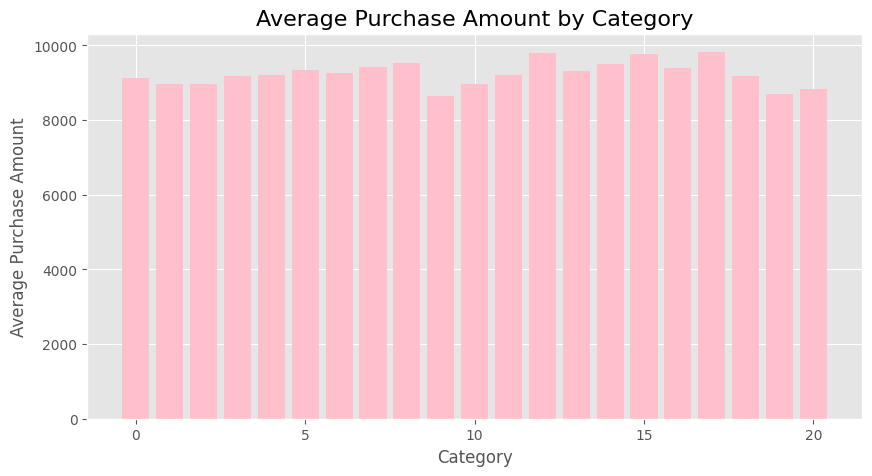

In [116]:
avg_purchase_series = pd.Series({
    0: 9124.428588,
    1: 8953.193270,
    2: 8952.481683,
    3: 9178.593088,
    4: 9213.980251,
    5: 9333.149298,
    6: 9256.535691,
    7: 9425.728223,
    8: 9532.592497,
    9: 8637.743761,
    10: 8959.355375,
    11: 9213.845848,
    12: 9796.640239,
    13: 9306.351061,
    14: 9500.702772,
    15: 9778.891163,
    16: 9394.464349,
    17: 9821.478236,
    18: 9169.655844,
    19: 8710.627231,
    20: 8836.494905
})

plt.figure(figsize=(10,5))

plt.bar(avg_purchase_series.index, avg_purchase_series.values, color='pink')
plt.title('Average Purchase Amount by Category', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount')
plt.show()

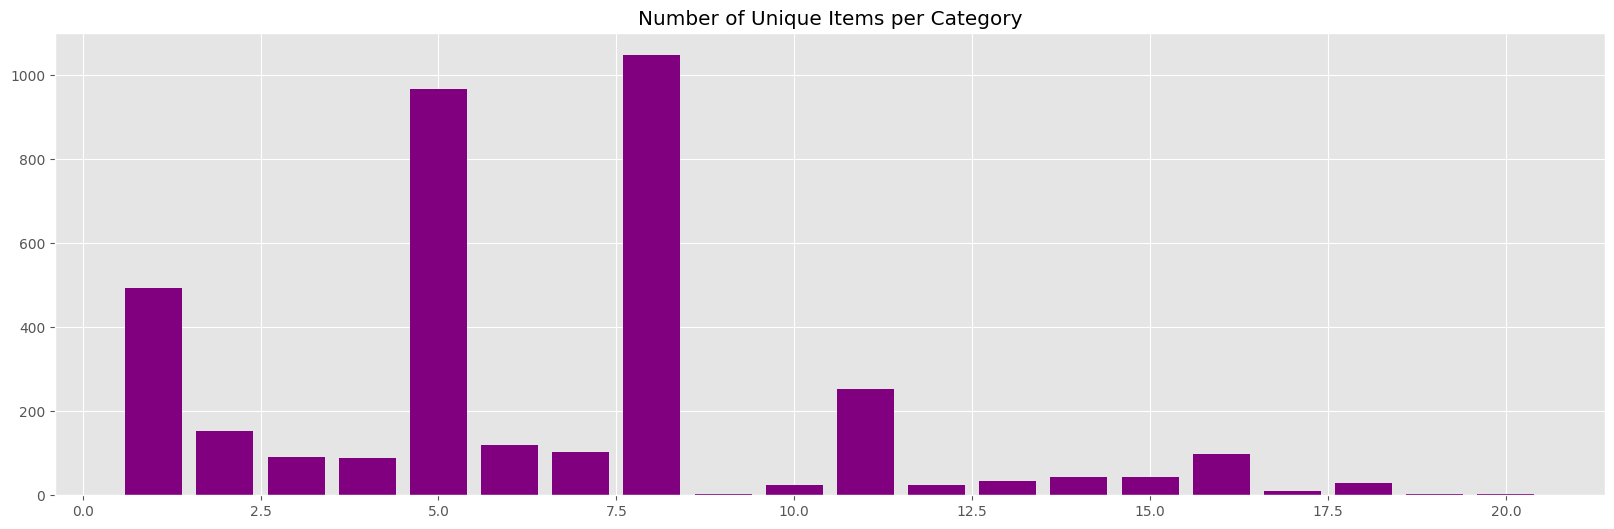

In [117]:
plt.figure(figsize=(20,6))
prod_by_cat = df.groupby('Product_Category_1')['Product_ID'].nunique()

plt.bar(prod_by_cat.index,prod_by_cat.values, color='purple')
plt.title('Number of Unique Items per Category')
plt.show()

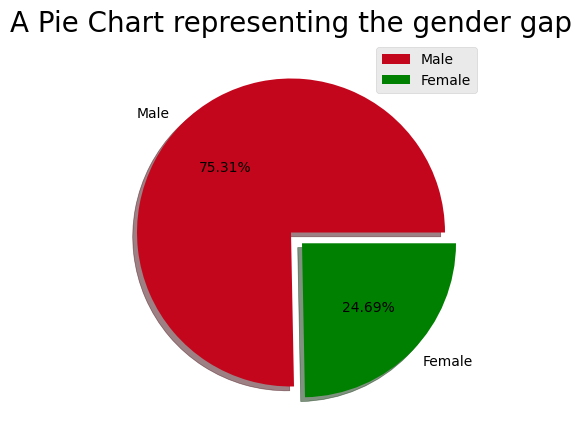

In [118]:
plt.figure(figsize=(10,5))
size = df['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [119]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

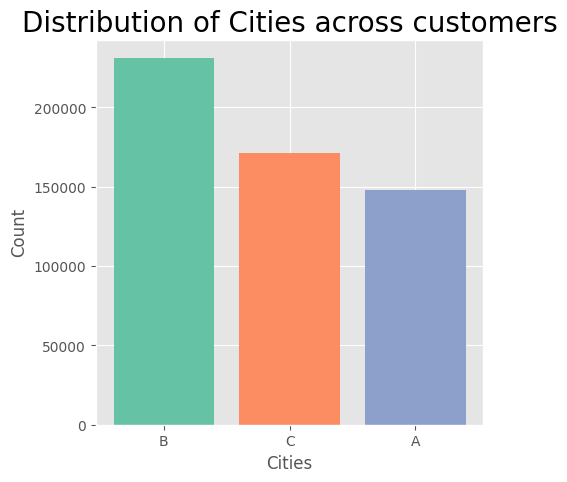

In [137]:
plt.figure(figsize=(5, 5))
palette = "Set2" 
city_category_counts = df['City_Category'].value_counts()

plt.bar(city_category_counts.index, city_category_counts, color=plt.get_cmap(palette).colors)
plt.title('Distribution of Cities across customers', fontsize=20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()


Majority of the customers are from City B


In [121]:
df['Product_Category_1'].value_counts()

Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

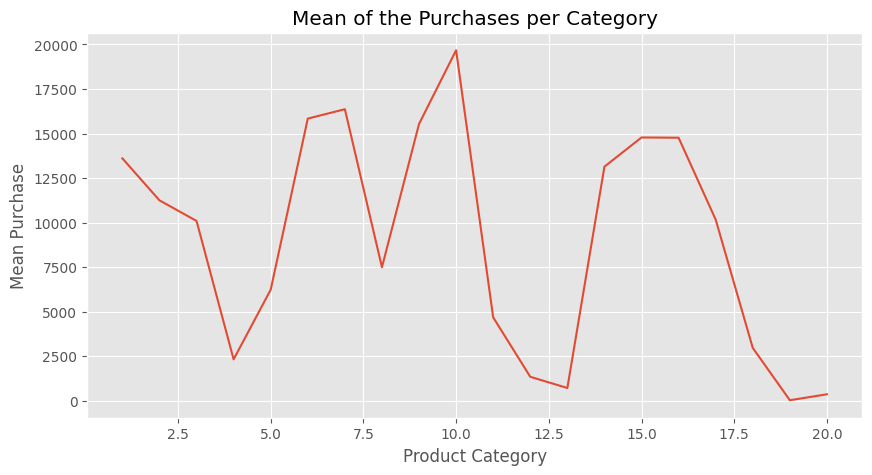

In [122]:
category = []
mean_purchase = []


for i in df['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(df[df['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(10,5))

plt.plot(category,mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

Product 10 has the highest demand during Black Friday with mean purchase of almost 20,000

In [123]:

df.groupby('Product_Category_1')['Purchase'].mean()

Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64

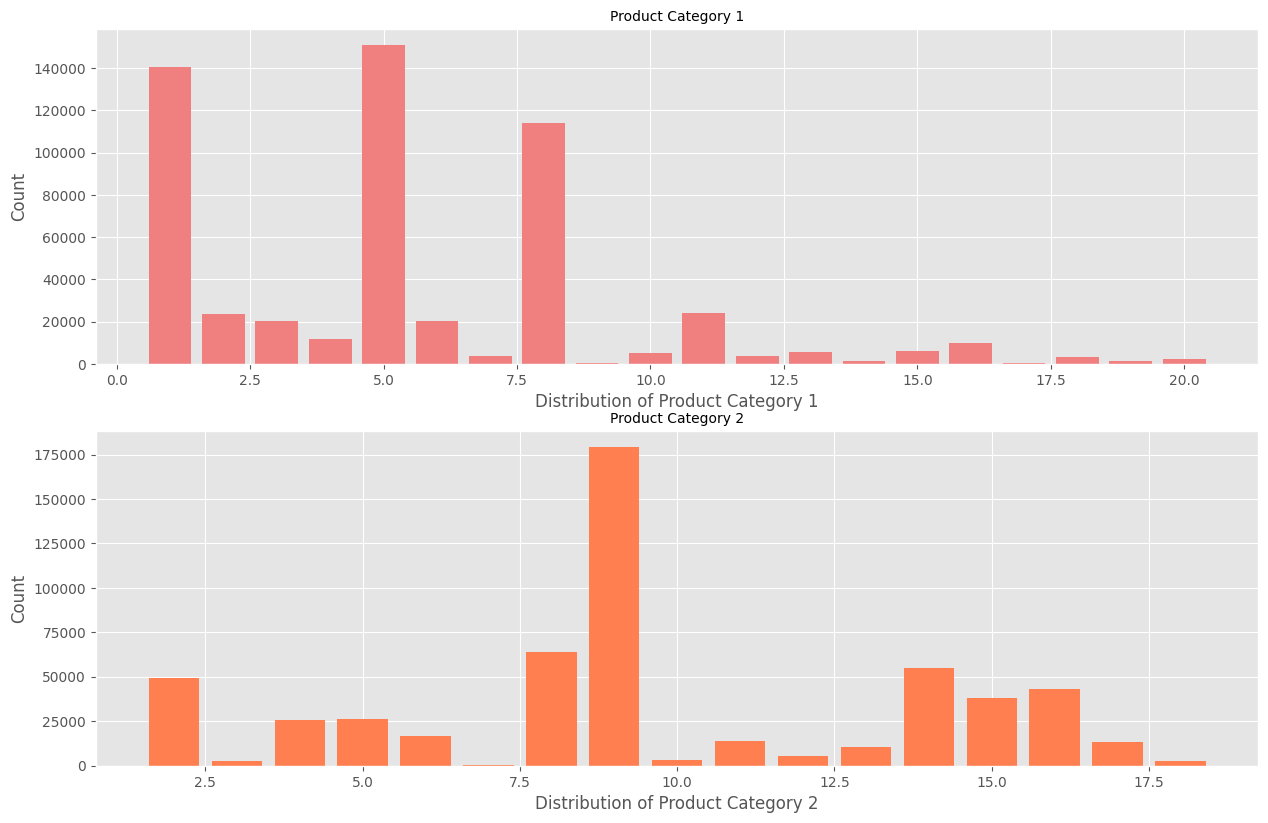

In [135]:

plt.rcParams['figure.figsize'] = (15, 20)
plt.style.use('ggplot')


plt.subplot(4, 1, 1)


categories_1, count_1 = np.unique(df['Product_Category_1'], return_counts=True)
plt.bar(categories_1, count_1, color='lightcoral')
plt.title('Product Category 1', fontsize=10)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')


plt.subplot(4, 1, 2)


categories_2, count_2 = np.unique(df['Product_Category_2'].dropna(), return_counts=True)
plt.bar(categories_2, count_2, color='coral')
plt.title('Product Category 2', fontsize=10)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.show()

The chart indicates that Product 5 experiences heightened demand within Product Category 1, while Product 10 garners the highest demand in Product Category 2.

array([[<Axes: title={'center': 'User_ID'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Marital_Status'}>,
        <Axes: title={'center': 'Product_Category_1'}>],
       [<Axes: title={'center': 'Product_Category_2'}>,
        <Axes: title={'center': 'Purchase'}>]], dtype=object)

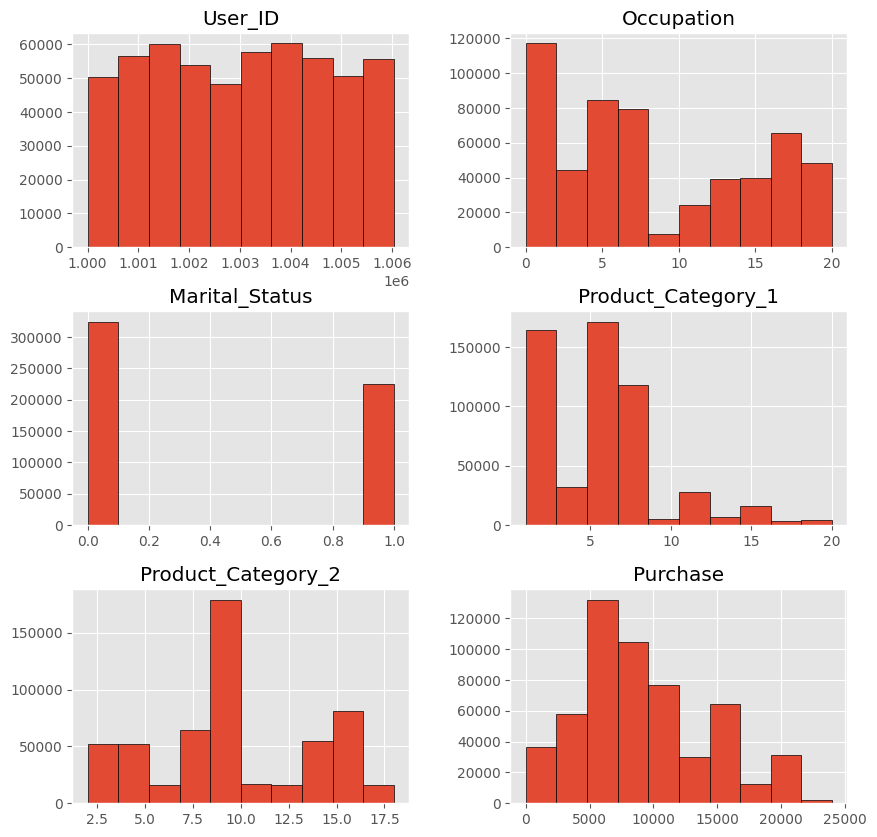

In [126]:
df.hist(edgecolor='black',figsize=(10,10))

This illustrates a visual representation of the dataset in the DataFrame.

/var/folders/qd/83xrc52s3fxcxk0n09rkwk7m0000gn/T/ipykernel_29060/40640269.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'], color = 'green', fit = norm)


The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


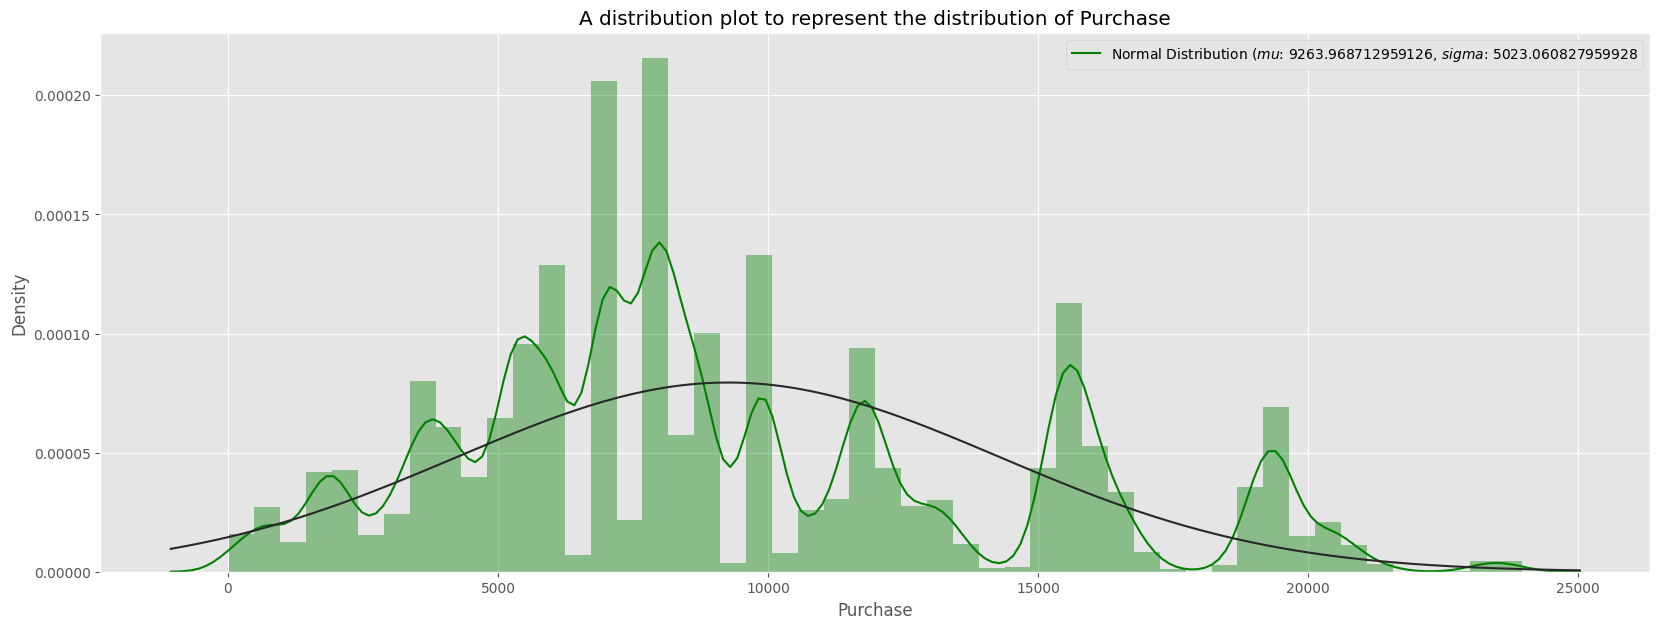

' \nThe kdeplot facilitates the visualization of data, specifically showcasing the distribution of the average \npurchase amounts made by individuals during Black Friday is within the 5000-10000 range.\n This aids in comprehending the economic expenditure patterns of the population.\n'

In [127]:
from scipy import stats
from scipy.stats import norm
import seaborn as sns


plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(df['Purchase'], color = 'green', fit = norm)
mu, sigma = norm.fit(df['Purchase']) 

print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

The kdeplot facilitates the visualization of data, specifically showcasing the distribution of the average 
purchase amounts made by individuals during Black Friday is within the 5000-10000 range.
This aids in comprehending the economic expenditure patterns of the population.